<a href="https://colab.research.google.com/github/philipjpark/P_Park_Quiz3/blob/main/P_Park_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning Messy Data: The Exploration of Wine#

## Part 1: Introduction ##

Wine is a "simple" alcoholic drink that is made from fermented grape juice enjoyed by hundred of millions of people across the world. The oldest known winery dates back to 4100 BCE in what is now known as the country of Armenia.

(Please refer to : https://vinepair.com/wine-colonized-world-wine-history/) 

Although wine is considered "simple"; the nuances, subtleties, and techniques involved can add value to specific, well-crafted bottles. Fine wine appreciates in value; while inferior wine depreciates over time. This exploration will dive into the chemical composition of wine and to clean this robust dataset, in order for it to be better suited for analysis. Ultimately, the cleaning of the data will allow for better usability. This usability can illuminate distinguishing traits of wine that add significant value, and other components that contribute nominally.     

**Statement of the Problem:** This EDA seeks to address the following issues:
1. Which, if any of the individual attributes need to be transformed prior to being used within a machine learning model. 
2. Justify the inclusion, modification or outright deletion of a specific data attribute.
3. Preliminary findings on what attributes carry more weight or value in a study on the valuation of wine. 


## Part 2: Data Summary ##

The wine dataset contains 16 attributes: 

- **Index:** Unique ID
- **TARGET:** Response Variable (indicates the # of cases of wine sold)
- **Fixed Acidity:** The fixed acidity of the wine. 
- **Volatile Acidity:** Volatile acid content of the various wines. 
- **Citric Acid:** Citric Acid content of the wine.
- **Density:** Density of the wine
- **Residual Sugar:** Residual sugar content of the wine. 
- **Chlorides:** Chloride content of the wine.
- **Free Sulfur Dioxide:** Sulfur Dioxide content of the wine. 
- **Total Sulfur Dioxide:** Total Sulfur Dioxide content of the wine.
- **Density:** The density of the wine.
- **pH:** pH of the wine
- **Sulphates:** Sulfate content of the wine. 
- **Alcohol:** Alcohol Contentby Percentage
-**Label Appeal:** A subjective marketing score that ranks the appeal and aesthetic of the bottle. 
- **Acid Index:** Measures the total acidity of wine via a weighted average. 
- **STARS:** Wine rating administered by experts in the field (4 = Excellent, 3 = Very Good, 2 = Good, 1 = Poor)

The vast set of attributes can lead to convoluted data analysis and so it is imperative that if there is superfluous data points; namely outliers, we need to handle them. Another issue might be that data saturation will make it diffcult to parse what attributes carry a lot of weight and which ones do not. 

#Exploratory Data Analysis#

**Synopsis of Wine Attributes**:

Here is a brief synopsis of each attribute's significance to the overall composition of wine.

1 - Fixed acidity (g/l): Most acids involved with wine are fixed or nonvolatile (do not evaporate readily).

2 - Volatile acidity (g/l): The amount of acetic acid in wine, which at too high of levels can lead to an unappealing odor.

3 - Citric Acid (g/l): Found in small quantities, citric acid can add a zesty flavor and create crispness of flavor. 

4 - Residual sugar (g/l): The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter. and wines with greater than 35 grams/liter are considered sweet

5 - Chlorides(g/l): The amount of salinity in wine. 

6 - Free sulfur dioxide (ppm): Prevents microbial growth and reduces oxidation.

7 - Total sulfur dioxide (ppm): Amount of free and bound forms of Sulfur Dioxide; in low concentrations, Sulfur Dioxide is mostly undetectable in wine. When Sulfur Dioxide concentrations go over 50 ppm, it becomes detectable to a wine-taster's sense of smell and taste. 

8 - Density (g/cubic cm): The density of water is close to that of water depending on the percent of sugar and alcohol content. 

9 - pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); Most wines have a pH ranging from 3-4. 

10 - Sulphates (ppm): A wine additive which can contribute to sulfur dioxide gas levels, wich acts as a deterrent to microbes and oxidation. 

11 - Alcohol (%): Percent of alcohol contained in the wine. 

Here is a list of **resources** that I used (Paratheticals refer to the attribute):

https://www.winemag.com/2021/11/09/volatile-acidity-wine/ (Volatile Acidity)

https://winemakersacademy.com/understanding-wine-acidity/ (Fixed Acidity)

https://daily.sevenfifty.com/the-science-of-salinity-in-wine/ (Chlorides)

https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/ (Residual Sugar)

https://www.randoxfood.com/why-is-testing-for-citric-acid-important-in-winemaking/#:~:text=Citric%20acid%20is%20one%20of,total%20acid%20content%20in%20grapes.(Citric Acid)

https://www.wineshopathome.com/understanding-sulfur-levels-wine/ (Free and Total Sulfur Dioxide)

http://www.creativeconnoisseur.com/newsletter/files/497deafe6be1b2efc87df8ac6071e459-162.html#:~:text=Quite%20obviously%20the%20density%20of,9%25%20more%20dense%20than%20water. (Density)

https://winefolly.com/deep-dive/understanding-acidity-in-wine/ (Acid Index)

https://winefolly.com/deep-dive/sulfites-in-wine/ (Sulphates)

https://winefolly.com/tips/the-lightest-to-the-strongest-wine/ (Alcohol)

https://www.bluelabelpackaging.com/blog/what-makes-appealing-wine-label/ (Wine Label)

For the purpose of this project, a separate subset of attributes has been created. 

<u>Quantitative data</u> includes: Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfure dioxide, total sulfur dioxide, density, pH, sulphates, acid index and alcohol.

The <u>categorical data</u> includes: STARS, TARGET, and Label Appeal.

##Initializing the Data##

First, I created a data variable using the pd.read_cvs().
Then, I outputted some initial information with the .head, .tail, and .shape method. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")

saved_data = data.copy()
print(data.head())
print(data.tail())
print(data.shape)


   INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160       -0.98           54.2   
1      2       3           4.5            0.160       -0.81           26.1   
2      4       5           7.1            2.640       -0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330       -1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0     -0.567                NaN               268.0  0.99280  3.33      -0.59   
1     -0.425               15.0              -327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3     -0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN             -167.0               108.0  0.99457  3.12       1.77   

   Alcohol  LabelAppeal  AcidIndex  STARS  


Next, I sorted the data to get a better look at the attributes and the null values to help filter out data points that need to be dealt with. 


In [ ]:
s_data = data.isnull().sum().sort_values(ascending=False)
print(s_data)

STARS                 3359
Sulphates             1210
TotalSulfurDioxide     682
Alcohol                653
FreeSulfurDioxide      647
Chlorides              638
ResidualSugar          616
pH                     395
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
Density                  0
LabelAppeal              0
AcidIndex                0
dtype: int64


Then, I created a ratio of null values to the total number of wines in the dataset. 

In [ ]:
p_data = s_data/data.shape[0]
print(p_data)

STARS                 0.262524
Sulphates             0.094568
TotalSulfurDioxide    0.053302
Alcohol               0.051036
FreeSulfurDioxide     0.050567
Chlorides             0.049863
ResidualSugar         0.048144
pH                    0.030871
INDEX                 0.000000
TARGET                0.000000
FixedAcidity          0.000000
VolatileAcidity       0.000000
CitricAcid            0.000000
Density               0.000000
LabelAppeal           0.000000
AcidIndex             0.000000
dtype: float64


Secondly, I used the **describe** method which outputs the following relevant metrics:
1. count - Number of not-empty values.
2. mean - Average
3. std - The standard deviation.
4. min - Minimum value.
5. 25% - The 25% percentile.
6. 50% - The 50% percentile.
7. 75% - The 75% percentile.
8. max - Maximum value.

Some preliminary takeaways:

Fixed Acidity has a very high max because at 75% it is 9.5 and the max is 34.4 g/l. Also the min is a negative which needs to be removed. 

Volatile Acidity and Citric Acidity seems to have a max leaning towards the high side. Any values under 0 for the fixed acidity, volatile acidity, citric acid, residual sugar, free sulfur dioxide, sulphates, alcohol and total dioxide has to be removed. 

The max for residual sugar is way too high as well. A wine is considered sweet if its sugar content is greater than 35 mL. The max of the Free Sulfur Dioxide is too high and should be pared down to the STD of approximately 150. Total Sulfur Dioxide, as well, should be greater than 0. 

For a better understanding of residual sugar levels, please refer to: https://whicherridge.com.au/blog/what-is-residual-sugar-in-wine/#:~:text=It%20is%20impossible%20to%20get,0.3%20to%202%20g%2FL.

In [ ]:
showData = data.describe()
showData.transpose()


,count,mean,std,min,25%,50%,75%,max
INDEX,12795.0,8069.980305,4656.905107,1.00000,4037.50000,8110.00000,12106.500000,16129.00000
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
FixedAcidity,12795.0,7.075717,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000
VolatileAcidity,12795.0,0.324104,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000
CitricAcid,12795.0,0.308413,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000
ResidualSugar,12179.0,5.418733,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000
Chlorides,12157.0,0.054822,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100
FreeSulfurDioxide,12148.0,30.845571,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000
TotalSulfurDioxide,12113.0,120.714233,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924


Then I used the nunique() method, which returns the number of unique values for each column. This was so I could check for variation in the data. 


In [ ]:
data.nunique()

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

#Data Preparation#

## Creating Subsets of the Dataset##

To organize the data better, I set up two different subsets. The numData subset contains numerical attributes and the catData subset contains categorical attributes. 

###Subset Creation###

In [ ]:
numData = data[['FixedAcidity','VolatileAcidity','CitricAcid','ResidualSugar','Chlorides','FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density','pH', 'Sulphates', 'Alcohol', 'AcidIndex']]
numData.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex
0,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,8
1,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,7
2,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,8
3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,6
4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,9


In [ ]:
catData = data[['STARS', 'TARGET', 'LabelAppeal']]
catData.head()

,STARS,TARGET,LabelAppeal
0,2.0,3,0
1,3.0,3,-1
2,3.0,5,-1
3,1.0,3,-1
4,2.0,4,0


Next, I needed to check for nulls and then to deal with them.

In [ ]:
numData.columns[numData.isnull().any()]

Index(['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'pH', 'Sulphates', 'Alcohol'],
      dtype='object')

In [ ]:
catData.columns[catData.isnull().any()]

Index(['STARS'], dtype='object')

It was imperative that I remove NaN values and so I leveraged the .dropna() method to clean up the categorical subset. 

In [ ]:
catData = catData.dropna()
catData

,STARS,TARGET,LabelAppeal
0,2.0,3,0
1,3.0,3,-1
2,3.0,5,-1
3,1.0,3,-1
4,2.0,4,0
...,...,...,...
12789,1.0,4,0
12791,2.0,5,-1
12792,2.0,4,0
12793,2.0,3,-1


#Prepped Data Review#

##Removing Superfluous Data##

The main focus of my data preparation was to get rid of the superfluous data that is towards the min and max. Through research and analysis, I came up with a few important edge cases that could be a point of reference for removal. 

Here are some of the takeaways and implementables from my research:
- An extremely sweet wine is 121 grams per liter, I capped the residual sugar attribute at 181.5 (1.5 x 121). 
-The Free Sulfur Dioxide is too high as well and so I used the STD of 150 to cap it. 

- Fixed acidity was dealt with by taking the 75% percentile for the fixed acidity and adding to the STD. 9.5 + 6.3 = 15.8.

*Please note: I am in the process of learning and tinkering with some of the techniques, as I refine my mathematical and statistical application skills, I will be able to use better methods to deal with outliers and fuzzy data.*


In [ ]:
numData.drop(numData[numData['Sulphates'] <0].index,inplace= True) 
numData.drop(numData[numData['FixedAcidity'] <0].index,inplace= True) 
numData.drop(numData[numData['CitricAcid'] <0].index,inplace= True) 
numData.drop(numData[numData['Chlorides'] <0].index,inplace= True) 
numData.drop(numData[numData['FreeSulfurDioxide'] <0].index,inplace= True) 
numData.drop(numData[numData['TotalSulfurDioxide'] <0].index,inplace= True) 
numData.drop(numData[numData['Alcohol'] <0].index,inplace= True) 
numData.drop(numData[numData['ResidualSugar'] <0].index,inplace= True) 
numData.drop(numData[numData['ResidualSugar'] > 181.5].index,inplace= True)
numData.drop(numData[numData['FreeSulfurDioxide'] > 181.5].index,inplace= True)
numData.drop(numData[numData['FixedAcidity'] > 15.8].index,inplace= True)   
numData1=numData.dropna()









Here are some visuals to show the progess made prepping the data. 

*Please note: There are representations of the data that I want to compare but I have to improve my understanding of what exactly is important and what is not. I will refine this notebook as my skills improve. This is a ceaseless endeavor and I will make sure to tinker and improve these representations.* 

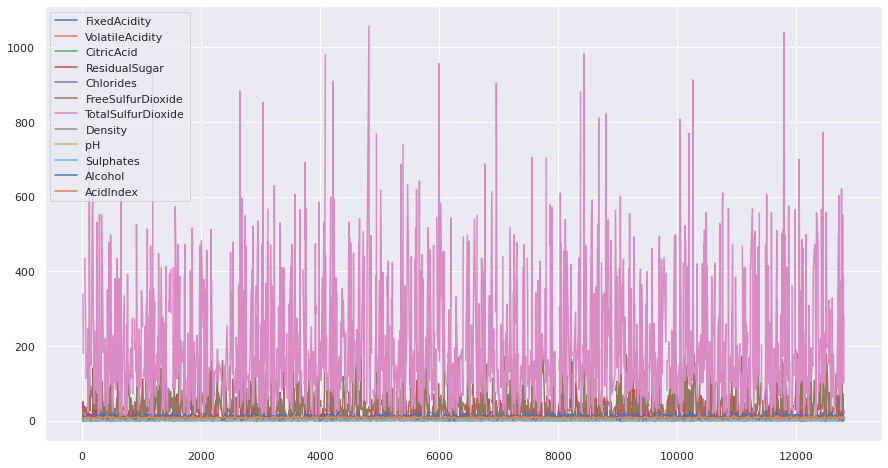

In [ ]:
numData1.plot()

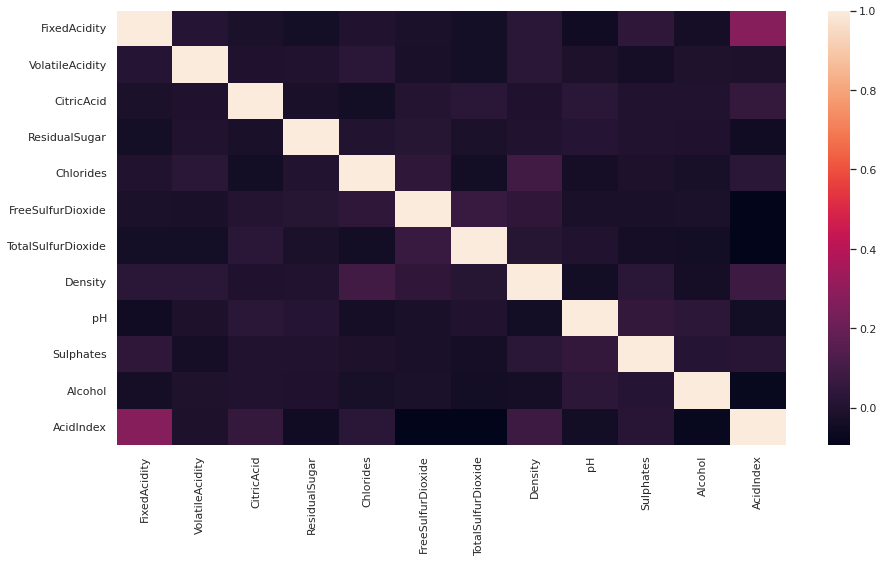

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(numData1.corr())
plt.show()


**Rating of the Wines**

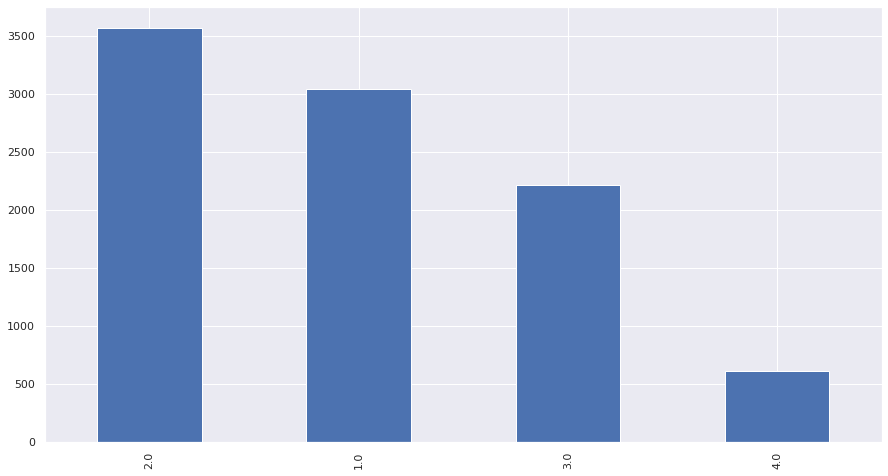

In [ ]:
catData['STARS'].value_counts().plot(kind='bar')

**Number of Cases of Wine Sold**

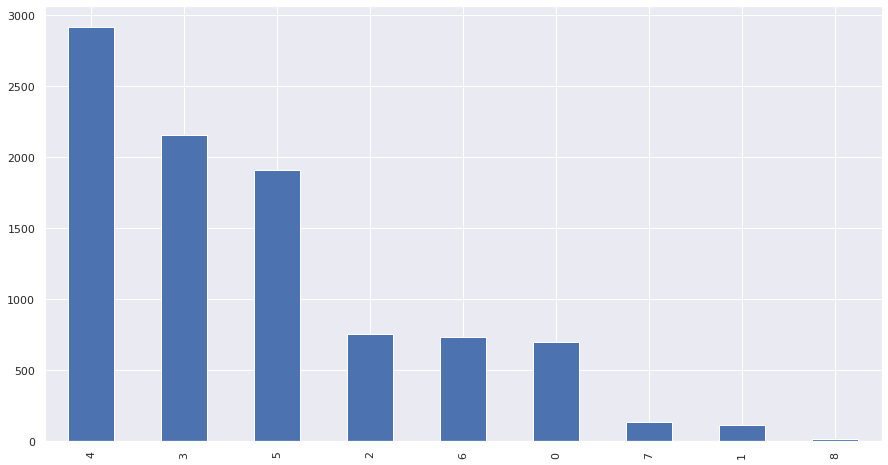

In [ ]:
catData['TARGET'].value_counts().plot(kind='bar')

**Label Appeal**

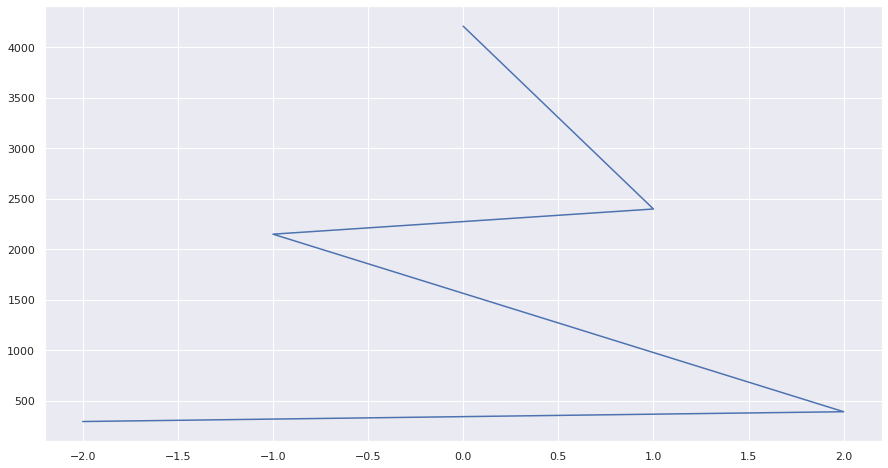

In [ ]:
catData['LabelAppeal'].value_counts().plot(kind='line')

#Conclusion#

**Review and Closing Remarks:**

The interplay between the free and total sulfur dioxide is an interesting and complex topic to explore. There might have to be modifications with the Residual Sugar attribute because there is no universal consensus in what constitutes as very sweet. Removing the nonsensical data (i.e sub-0 for the lower range and astronomically high figures for the upper range) is a solid step. Improving domain literacy in the area of wine is also a must. 

It is a work in progress but revisiting this dataset and notebook with some more tools in the DS toolbelt might be the catalyst for some interesting insights into this robust dataset.  

##Resources##

Here is a list of resources that I used throughout the assignment:
https://www.udemy.com/course/python-for-all-with-a-focus-on-financial-applications/learn/lecture/24099026#overview

https://stackoverflow.com/questions/33889310/r-summary-equivalent-in-numpy

https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

https://www.delftstack.com/howto/python-pandas/how-to-filter-dataframe-rows-based-on-column-values-in-pandas/#:~:text=are%20not%20300%20.-,Select%20Pandas%20Rows%20With%20Column%20Values%20Greater%20Than%20or%20Smaller,while%20creating%20masks%20or%20queries.&text=This%20results%20in%20DataFrame%20with,than%20or%20equal%20to%20300%20.

https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

https://www.delftstack.com/howto/seaborn/size-of-seaborn-heatmap/

https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib